#No 1

In [ ]:
# Import Package yang diperlukan untuk nomor 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
a, b = -4, 2
np.random.seed(28)
X = np.random.rand(20)
y = a*X + b + np.random.rand(20)

Inisiasi data artifisial yang berkorelasi linier, sebanyak 20 data, menggunakan $a=-4$ dan $b=2$

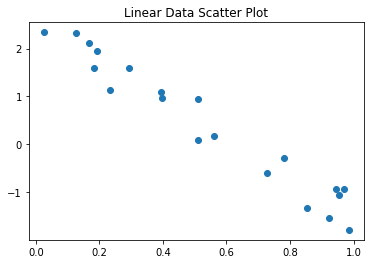

In [ ]:
plt.scatter(X,y)
plt.title('Linear Data Scatter Plot')
plt.show()

Plot scatter dari data artifisial yang telah dibuat pada kode sebelumnya. Terlihat data cenderung berkorelasi negatif (menuju kanan bawah), karena $a$ yang dipilih adalah negatif (yaitu -4)

In [ ]:
n = 20                                                                                            # n: banyaknya data artifisial
coef_1 = (n*((X*y).sum())-(X.sum())*(y.sum()))/(n*((X**2).sum())-(X.sum())**2)                    # inisiasi coef
intercept_1 = ((y.sum())*((X**2).sum())-(X.sum())*((X*y).sum()))/(n*((X**2).sum())-(X.sum())**2)  # inisiasi intercept

Inisiasi formula coef dan intercept, dimana:

$coef=\frac{n\sum{xy}-\sum{x}\sum{y}}{n\sum{x^2}-(\sum{x})^2}$,   
$intercept=\frac{\sum{y}\sum{x^2}-\sum{x}\sum{xy}}{n\sum{x^2}-(\sum{x})^2}$

In [ ]:
coef_1, intercept_1

(-4.063834207763128, 2.5765751737484495)

Didapatkan nilai coef = -4.063834207763128, dan intercept = 2.5765751737484495

In [ ]:
lin_reg = LinearRegression()   # inisiasi model yang akan digunakan
lin_reg.fit(X.reshape(20,1),y) # training data

LinearRegression()

Inisiasi model Linear Regression dan men-train data

In [ ]:
print('sklearn Linear Regression coef:', lin_reg.coef_[0])                                                # print coef yang dihasilkan sklearn
print('sklearn Linear Regression intercept:', lin_reg.intercept_)                                         # print intercept yang dihasilkan sklearn
print('Linear Regression coef with formula:', coef_1)                                                     # print coef yang dihasilkan formula
print('Linear Regression intercept with formula:', intercept_1)                                           # print intercept yang dihasilkan formula
print('Difference between coef with sklearn and formula:', abs(coef_1 - lin_reg.coef_[0]))                # membandingkan selisih absolut dari coef
print('Difference between intercept with sklearn and formula:', abs(intercept_1 - lin_reg.intercept_))    # membandingkan selisih absolut dari intercept

sklearn Linear Regression coef: -4.063834207763123
sklearn Linear Regression intercept: 2.5765751737484464
Linear Regression coef with formula: -4.063834207763128
Linear Regression intercept with formula: 2.5765751737484495
Difference between coef with sklearn and formula: 5.329070518200751e-15
Difference between intercept with sklearn and formula: 3.1086244689504383e-15


Membandingkan coef dan intercept yang didapat melalui formula, dengan yang didapat melalui training data dengan sklearn. Didapatkan bahwa selisih absolutnya sangat kecil, yaitu $<10^{-14}$ baik untuk coef maupun intercept.

Sehingga dapat disimpulkan bahwa coef dan intercept yang dihasilkan oleh formula dan dengan sklearn berbeda, tetapi perbedaannya sangatlah kecil.

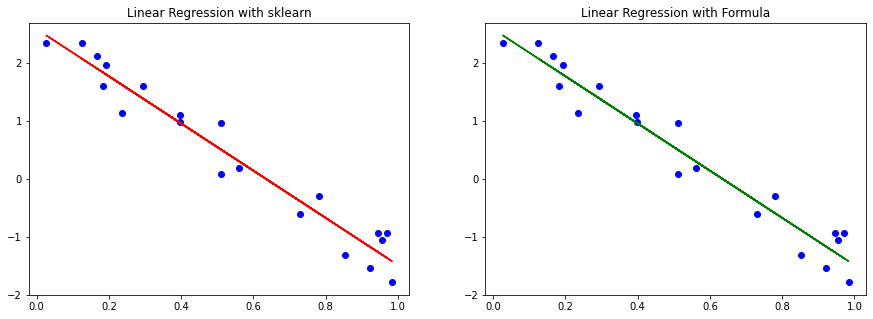

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))                   # inisiasi figure dan axis, serta banyaknya plot (1 row, 2 column) serta size dari figure
ax[0].plot(X, lin_reg.coef_[0]*X + lin_reg.intercept_, 'r')   # plot garis regresi linier yang dihasilkan sklearn
ax[0].scatter(X,y, c='b')                                     # plot scatter data artifisial
ax[0].set_title('Linear Regression with sklearn')             # set judul untuk plot sklearn
ax[1].plot(X, coef_1*X + intercept_1, 'g')                    # plot garis regresi linier yang dihasilkan formula
ax[1].scatter(X,y, c='b')                                     # plot scatter data artifisial
ax[1].set_title('Linear Regression with Formula')             # set judul untuk plot formula
plt.show()

Plot garis regresi linier yang dihasilkan oleh sklearn (kiri) dan oleh formula (kanan), serta scatter plot dari data artifisialnya.

In [ ]:
RMSE_formula = mean_squared_error(y, coef_1*X + intercept_1)**(1/2)           # menghitung RMSE dengan coef dan intercept yang dihitung menggunakan formula
RMSE_sklearn = mean_squared_error(y, lin_reg.predict(X.reshape(20,1)))**(1/2) # menghitung RMSE dengan prediksi model Linier Regression
print('RMSE with formula:', RMSE_formula)
print('RMSE with sklearn:', RMSE_sklearn)

RMSE with formula: 0.30504873947277805
RMSE with sklearn: 0.305048739472778


RMSE yang dihasilkan oleh formula lebih besar daripada oleh sklearn, walau perbedaannya sangat kecil

In [ ]:
joblib.dump(lin_reg, 'model_nomor_1.pkl')

['model_nomor_1.pkl']

Menyimpan model

# No 2

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
import joblib
import numpy as np

Import package yang dibutuhkan nomor 2

## Data Exploration

In [3]:
iris_data = pd.read_csv('/content/Iris.csv')  # inisiasi data Iris.csv ke variabel iris_data
iris_data.head()                              # melihat 5 baris pertama dari iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.shape # cek banyaknya baris dan kolom dari iris_data

(150, 6)

Terdapat 150 baris dan 6 kolom pada iris_data

In [ ]:
iris_data.info()  # cek tipe data pada masing - masing fitur, serta null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Didapatkan bahwa tidak terdapat null values pada iris_data. Tipe data dari semua predictor variabel (Id sampai PetalWidthCm) adalah numerik, dan target variabelnya (Species) adalah kategorik

In [4]:
iris_data.Species.unique()  # cek macam-macam class pada target variabel

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Didapatkan bahwa terdapat 3 kelas pada target variabel, yaitu Iris-setosa, Iris-versicolor, dan Iris-virginica

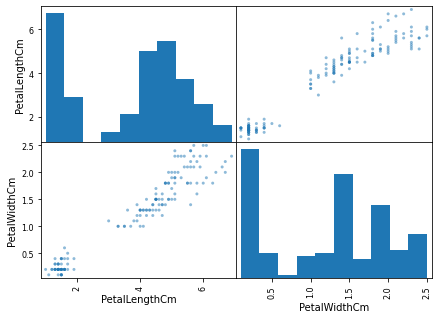

In [5]:
pd.plotting.scatter_matrix(iris_data[['PetalLengthCm', 'PetalWidthCm']], figsize=(7,5))  # membuat scatter plot dari kedua fitur Petal
plt.show()

Karena pada soal, fitur yang diminta untuk digunakan hanyalah petal nya, sehingga disini saya plotting korelasi antara panjang dan lebar petal. Terlihat pada scatter plotnya keduanya memiliki korelasi positif yang besar.

## Data Preprocessing

In [6]:
X = iris_data[['PetalLengthCm', 'PetalWidthCm']]  # mengambil panjang dan lebar petal sebagai predictor variabel
y = iris_data['Species']                          # mengambil kolom 'Species' sebagai target variabel

In [9]:
# Variabel y dilakukan encoding dengan OrdinalEncoder, sehingga nantinya berbentuk numerik

ordinal_encoder = OrdinalEncoder()
y_new = ordinal_encoder.fit_transform(np.array([y]).reshape(-1,1))  # Hasil encoding dari y disimpan ke variabel y_new
y_new = y_new.ravel()                                               # Mengubah bentuk y_new menjadi dimensi 1, karena hasil encoding masih berdimensi 2                                           

In [13]:
y_new

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Variabel y saya encode karena algoritma plotting decision boundary (dibawah) yang saya gunakan mengharuskan target variabelnya bertipe numerik

In [ ]:
ordinal_encoder.categories_ # cek kategori hasil encoding

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

Karena Iris-setosa berada di index 0 (pada ordinal_encoder.categories_), maka nilai 0 pada y_new merepresentasikan Iris-setosa. Begitu juga dengan Iris-versicolor yang bernilai 1 dan Iris-virginica yang bernilai 2, pada y_new.

In [17]:
X_new = X.to_numpy()  # mengubah bentuk X menjadi numpy array

## Split train set dan test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3)  # split train dan test set dengan modul sklearn train_test_split, dengan 
                                                                                  # test_size 30% dari keseluruhan data

Train set disimpan pada X_train (untuk predictor variable) dan y_train (untuk target variable), test set disimpan pada X_test dan y_test

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # cek jumlah data train dan test set nya

((105, 2), (45, 2), (105,), (45,))

Didapatkan bahwa ada 105 data pada train set dan 45 data pada test set

## Tuning model

In [ ]:
log_reg = LogisticRegression()  # inisiasi model LogisticRegression ke variabel log_reg

In [ ]:
# Menggunakan metode Grid Search untuk mencari hyperparameter terbaik dari log_reg
grid_search = GridSearchCV(log_reg, 
                           {'multi_class':['ovr', 'multinomial'],
                            'C':[0.1,0.3,0.5,0.7,1,1.5,3,5,10,50,100]}, 
                           cv=3, 
                           scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 3, 5, 10, 50, 100],
                         'multi_class': ['ovr', 'multinomial']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_, grid_search.cv_results_['mean_test_score'].max()

({'C': 0.3, 'multi_class': 'multinomial'}, 0.9523809523809524)

Pada 3 cell kode diatas, saya menggunakan Grid Search untuk mencari nilai hyperparameter terbaik (yaitu multi_class dan C) untuk log_reg. Dengan cross validation 3 folds, serta evaluation metrics nya adalah akurasi.

Didapatkan bahwa dengan C = 0.3 dan multi_class = multinomial (yang merupakan terbaik diantara nilai C dan multi_class lainnya), akurasi model pada cross validation mencapai 95%

In [ ]:
log_reg = grid_search.best_estimator_ # menyimpan model terbaik hasil grid search

Model LogisticRegression dengan hyperparameter C = 0.3 dan multi_class = multinomial (hasil Grid Search), disimpan pada variabel log_reg

## Training model dan evaluasi model

In [ ]:
# Training model
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.3, multi_class='multinomial')

In [ ]:
# Prediksi class X_test, menggunakan model log_reg yang sudah di-train, lalu disimpan pada variabel y_test_predict
y_test_predict = log_reg.predict(X_test)

In [ ]:
# Cek nilai akurasi dari y_test_predict
accuracy_score(y_test, y_test_predict)

1.0

DIdapatkan akurasi dari prediksi model adalah 100%

In [ ]:
print(classification_report(y_test, y_test_predict))  # cek precision, recall, f1-score menggunakan module sklearn classification_report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Didapatkan model log_reg mampu memprediksi nilai X_test dengan sempurna, yaitu semua nilai precision, recall, f1 score, dan akurasi mencapai 1

## Plotting

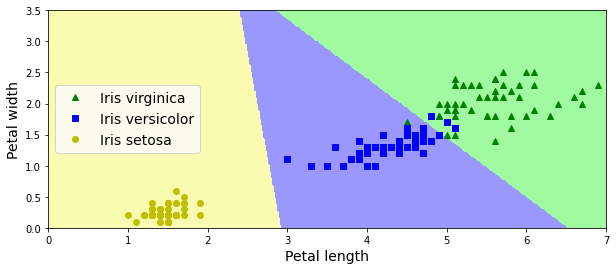

In [ ]:
# Plotting data Petal Iris dan decision boundary dari model

# Inisiasi data sementara untuk digunakan dalam mem-plotting decision boundary
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = log_reg.predict(X_new)

zz = y_predict.reshape(x0.shape)

# Plotting data Petal iris
plt.figure(figsize=(10, 4))                                                                 # inisiasi size figure
plt.plot(X[y_new==2].iloc[:,0], X[y_new==2].iloc[:,1], "g^", label="Iris virginica")        # plot iris virginica
plt.plot(X[y_new==1].iloc[:,0], X[y_new==1].iloc[:,1], "bs", label="Iris versicolor")       # plot iris versicolor
plt.plot(X[y_new==0].iloc[:,0], X[y_new==0].iloc[:,1], "yo", label="Iris setosa")           # plot iris setosa

# Plotting decision boundaries
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])                               # list warna yang akan digunakan decision boundary

plt.contourf(x0, x1, zz, cmap=custom_cmap)                                                  # Plotting decision boundary dengan plt.contourf
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## Menjawab soal

In [ ]:
soal = [[[4,2]], [[2.4,3]], [[5.6,3.3]]]    # memasukkan nilai - nilai length dan width pada soal dalam list di dalam list
for i in soal:                              # looping untuk menjawab masing - masing soal
  jawab = log_reg.predict(i)                # memprediksi class dari petal length dan width di index ke-i dan dimasukkan ke variabel jawab
  if jawab == 0:                            # jika jawab = 0, maka seperti yang ada pada ordinal_encoder.categories_ diatas, classnya adalah Iris setosa
    print('Petal Length {0} cm, Width {1} cm, Class = Iris setosa'.format(i[0][0], i[0][1]))
  elif jawab == 1:                                                                                # jika jawab = 1, maka classnya adalah iris versicolor
    print('Petal Length {0} cm, Width {1} cm, Class = Iris versicolor'.format(i[0][0], i[0][1]))
  else:                                                                                           # jika jawab = 2, maka classnya adalah iris virginica
    print('Petal Length {0} cm, Width {1} cm, Class = Iris virginica'.format(i[0][0], i[0][1]))

Petal Length 4 cm, Width 2 cm, Class = Iris versicolor
Petal Length 2.4 cm, Width 3 cm, Class = Iris setosa
Petal Length 5.6 cm, Width 3.3 cm, Class = Iris virginica


Didapatkan jawabannya seperti pada output diatas

In [ ]:
joblib.dump(log_reg, 'model_nomor_2.pkl')

['model_nomor_2.pkl']

Menyimpan model

# No 3

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Import package yang dibutuhkan untuk Nomor 3

## Data Exploration

In [ ]:
# Membaca .txt tentang kolom - kolom dataset yang diberikan pada soal
with open('/content/about dataset.txt', 'r') as f:
  print(f.read())

About datasets
1. age - age in years 
2. sex - sex (1 = male; 0 = female) 
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic) 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. chol - serum cholestoral in mg/dl 
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy) 
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping) 
12. ca - number of major vessels (0-3) colored by flourosopy 
13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect 
14. output - the predicted attribute - diagnosis of heart disease (0 = less chance of heart attack, 1 = higher chance of heart attack)



In [4]:
heart_data = pd.read_csv('/content/heart.csv')  # inisiasi data heart.csv pada variabel heart_data
heart_data.head()                               # melihat 5 baris awal heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.info() # cek jumlah baris, kolom, tipe data, dan null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Didapatkan bahwa heart_data memiliki 303 baris dan 14 kolom, dimana tiap kolomnya adalah bertipe numerik, serta tidak terdapat null values pada data

In [ ]:
heart_data.output.unique()  # melihat banyaknya class dan apa saja class pada heart_data 

array([1, 0])

In [ ]:
heart_data.output.value_counts()  # cek apakah data balanced atau tidak

1    165
0    138
Name: output, dtype: int64

Karena perbedaan data dengan value 1 dan data dengan value 0 tidak terlalu besar, maka saya menyimpulkan dataset heart_data cukup balanced 

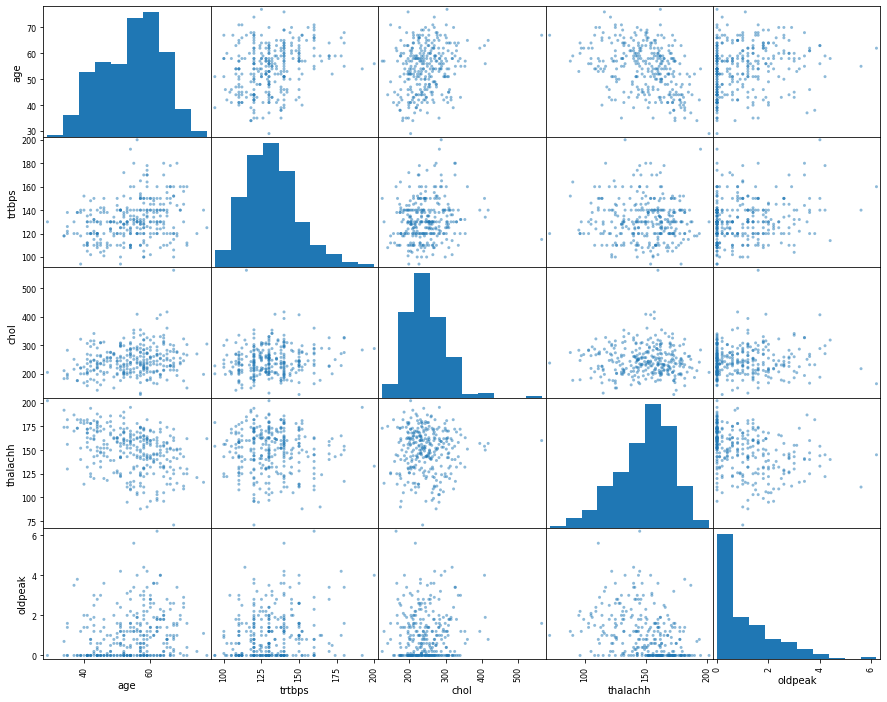

In [ ]:
pd.plotting.scatter_matrix(heart_data[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']], figsize=(15,12)) # plot data yang numerik dan kontinu
plt.show()

Plot diatas saya ingin melihat korelasi secara kasar antara fitur - fitur yang numerik dan kontinu, melalui scatter plot, serta range nilai datanya melalui histogramnya.

Melalui scatter plot dapat kita lihat bahwa kita belum bisa menyimpulkan  korelasi antara fitur - fitur, karena persebarannya sebagian besar sangat acak. Melalui histogram dapat dilihat bahwa range nilainya cukup berjauhan (oldpeak 0 sampai 6, sedangkan chol 100 sampai 500+), sehingga perlu dilakukan standarisasi pada data numerik nantinya dengan StandardScaler

In [6]:
heart_corr = heart_data.corr()  # membuat matriks korelasi dan disimpan pada variabel heart_corr
heart_corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Karena terlalu banyak fitur pada matriks korelasi diatas, sehingga diperlukan visualisasi agar lebih mudah untuk mengambil keputusan 

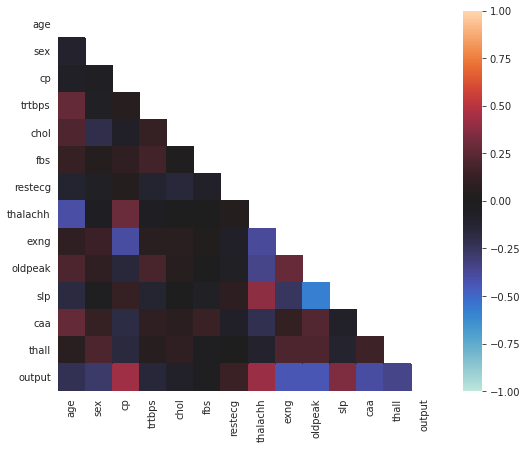

In [ ]:
# membuat heatmap dari matriks korelasi
mask = np.zeros_like(heart_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(heart_corr, mask=mask, vmax=1, vmin=-1, square=True, center=0)

Heatmap diatas menunjukan bahwa, kotak dengan warna menuju merah terang berkorelasi positif dan tinggi, kotak dengan warna menuju biru terang berkorelasi negatif dan tinggi, serta kotak dengan warna menuju hitam tidak berkorelasi. Dengan visualisasi heatmap tersebut, kita dapat lihat bahwa terdapat fitur - fitur yang berkorelasi rendah (menuju 0) dengan output (target variabelnya), antara lain trtbps, chol, fbs, dan restecg. Sehingga saya tidak akan mengambil fitur - fitur tersebut untuk predictor variabelnya

## Feature Selection

In [7]:
important_corr_val = abs(heart_corr.output[:13]).mean() # menghitung rata - rata besaran korelasi absolut predictor variable dengan target variabel (output)
important_corr_val

0.2851110313190721

In [8]:
important_corr = heart_corr.output[abs(heart_corr.output) > important_corr_val][:7] # mengambil fitur dengan nilai korelasi absolut lebih besar dari important_corr_val
important_corr

cp          0.433798
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
Name: output, dtype: float64

Agar pengambilan fitur untuk predictor variabel lebih akurat, pada important_corr_val saya menghitung rata - rata besaran korelasi absolut antara predictor dan target variabel, dan didapatkan rata - ratanya adalah sebesar 0.2851110313190721. Kemudian saya mengambil fitur - fitur yang korelasi absolutnya dengan 'output' lebih besar dari 0.2851110313190721 beserta besaran korelasinya, lalu disimpan dalam important_corr.

Pada heatmap kita dapat lihat juga bahwa fitur age berkorelasi cukup besar dengan salah satu fitur yang korelasi dengan output nya besar, yaitu thalachh. Sehingga saya akan mengambil juga age sebagai predictor variabel

## Split train dan test set

In [57]:
X = heart_data[np.insert(important_corr.index.values,0,'age')].values # menyimpan predictor variable pada X dalam bentuk numpy array
y = heart_data['output'].values                                       # menyimpan target variable pada y dalam bentuk numpy array

Pada X fitur yang diambil adalah fitur yang berkorelasi besar dengan output, serta ditambah age. Kemudian y adalah target variabelnya, yaitu kolom output

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # split train dan test set, dengan test size sebesar 20% dari banyak data aslinya
X_train.shape, X_test.shape, y_train.shape, y_test.shape                  # cek banyaknya train dan test set

((242, 8), (61, 8), (242,), (61,))

## Data preprocessing

In [59]:
std_scale = StandardScaler()
X_train_prepared = std_scale.fit_transform(X_train) # standarisasi X_train dan disimpan pada variabel X_train_prepared

Karena pada visualisasi sebelumnya, range nilai antara predictor variabel cukup berbeda, maka perlu dilakukan standarisasi.

Standarisasi diatas saya lakukan terpisah antara X_train dan X_test, karena X_test saya anggap sebagai data baru yang belum pernah dilihat sebelumnya. Sehingga std_scale nantinya hanya mentransform (tidak memfit) X_test, dan fit hanya dilakukan pada X_train

## Tuning model

In [60]:
log_reg = LogisticRegression()            # inisiasi model logistic regression
svm_class = SVC()                         # inisiasi model SVM
decision_tree = DecisionTreeClassifier()  # inisiasi model Decision tree

In [68]:
# melakukan cross validation pada masing-masing metode
print(cross_val_score(log_reg, X_train_prepared, y_train, cv=5, scoring='f1').sum()/5)
print(cross_val_score(svm_class, X_train_prepared, y_train, cv=5, scoring='f1').sum()/5)
print(cross_val_score(decision_tree, X_train_prepared, y_train, cv=5, scoring='f1').sum()/5)

0.8484667926275504
0.8711500974658868
0.7599777455249154


Agar test set tidak "disentuh" dahulu, tuning model saya lakukan dengan metode cross validation, dengan 5 folds dan evaluation metrics-nya adalah f1 score.

Didapatkan bahwa pada cross validation, f1 score tertinggi ada pada SVM, yaitu sebesar 0.87

In [69]:
# melakukan grid search untuk masing-masing metode untuk mencari hyperparameter terbaik
log_reg_param = {'C':[0.01,0.05,0.1,0.5,0.7,1,5,10,50,100]} # hyperparameter yang akan dievaluasi untuk logistic regression
svc_param = {'C':[0.01,0.05,0.1,0.7,0.5,1,5,10,50,100],     # hyperparameter yang akan dievaluasi untuk SVM
             'kernel':['poly','rbf']}
dec_tree_param = {'criterion':['gini', 'entropy'],          # hyperparameter yang akan dievaluasi untuk decision tree
                  'max_depth':[3,4,5,6]}

for model, params in zip([log_reg, svm_class, decision_tree], [log_reg_param, svc_param, dec_tree_param]):
  grid_search = GridSearchCV(model, params, cv=5, scoring='f1')                                             # inisiasi grid search
  grid_search.fit(X_train_prepared, y_train)                                                                # fitting grid search
  print(grid_search.best_params_, grid_search.cv_results_['mean_test_score'].max())                         # print hyperparameter terbaik pada masing-masing metode dan f1 score-nya

{'C': 0.01} 0.859645927204167
{'C': 0.1, 'kernel': 'rbf'} 0.8711500974658868
{'criterion': 'entropy', 'max_depth': 3} 0.8476645357745454


Lebih lanjut, saya melakukan Grid Search untuk mencari hyperparameter terbaik untuk masing-masing metode. Didapatkan bahwa SVM dengan C=0.1 dan kernel = rbf memiliki f1 score tertinggi, yaitu 0.87. Sehingga akan digunakan model SVM dengan c = 0.1 dan kernel rbf, karena memiliki nilai f1 score tertinggi

In [70]:
svm_class = SVC(C=0.1, kernel='rbf')  # menyimpan SVM dengan C=0.1 dan kernel=rbf ke variabel svm_class

## Training dan evaluasi model

In [71]:
svm_class.fit(X_train_prepared, y_train)  # training model pada X_train_prepared dan y_train

SVC(C=0.1)

In [72]:
X_test_prepared = std_scale.transform(X_test) # standarisasi X_test dengan std_scale yang telah difit pada X_train, lalu disimpan dalam X_test_prepared

In [73]:
# memprediksi class X_test_prepared lalu disimpan pada y_predict
y_predict = svm_class.predict(X_test_prepared)
y_predict

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [74]:
# menghitung f1 score dari y_predict
f1_score(y_test, y_predict)

0.84375

Didapatkan f1 score dari model SVM yang telah dibuat pada y_predict terhadap y_test adalah 0.84375

In [76]:
import joblib
joblib.dump(svm_class, 'model_nomor_3.pkl')

['model_nomor_3.pkl']

Menyimpan model

# No 4

In [88]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

Import package yang diperlukan untuk nomor 4

## Data Exploration

In [78]:
credit_card = pd.read_csv('/content/CreditCard.csv')  # inisiasi CreditCard.csv dan disimpan pada variabel credit_card
credit_card.head()                                    # melihat 5 baris awal credit_card

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [79]:
# melihat banyaknya baris, kolom, tipe data, dan null values
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

Pada credit_card terdapat 9709 baris dan 20 kolom, dengan target variabelnya adalah kolom 'Target', serta tidak terdapat null values pada credit_card 

In [187]:
# melihat class pada data credit_card
credit_card.Target.unique()

array([1, 0])

credit_card memiliki 2 class, yaitu 0 dan 1

In [188]:
# cek apakah data balanced atau tidak
credit_card.Target.value_counts()

0    8426
1    1283
Name: Target, dtype: int64

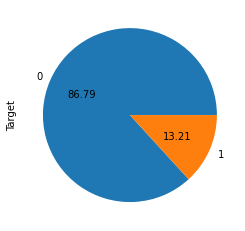

In [189]:
# cek apakah data balanced atau tidak dengan pie plot
credit_card.Target.value_counts().plot.pie(autopct='%.2f')

Dari dua cell kode diatas, dapat dilihat bahwa data sangat imbalanced. 86.79% dari data mempunyai class 0, sedangkan class 1 hanya 13.21%. Sehingga perlu dilakukan proses sampling nantinya. 

## Feature Selection

In [81]:
# Menghapus kolom yang sekiranya tidak terlalu penting
credit_card.drop(['ID', 'Gender', 'Num_children', 'Work_phone', 'Phone', 'Email', 'Account_length', 'Income_type', 'Family_status', 'Occupation_type'], axis=1, inplace=True)

In [82]:
credit_card.head()

,Own_car,Own_property,Unemployed,Num_family,Total_income,Age,Years_employed,Education_type,Housing_type,Target
0,1,1,0,2,427500.0,32.868574,12.435574,Higher education,Rented apartment,1
1,1,1,0,2,112500.0,58.793815,3.104787,Secondary / secondary special,House / apartment,0
2,0,1,0,1,270000.0,52.321403,8.353354,Secondary / secondary special,House / apartment,0
3,0,1,1,1,283500.0,61.504343,0.000000,Higher education,House / apartment,0
4,1,1,0,2,270000.0,46.193967,2.105450,Higher education,House / apartment,0


Kolom - kolom diatas adalah kolom yang saya duga penting dalam memprediksi target variabelnya

## Split train dan test set

In [83]:
X = credit_card.drop('Target', axis=1)  # inisiasi predictor variabel dan disimpan dalam X
y = credit_card[['Target']]             # inisiasi target variabel dan disimpan dalam y

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # split train dan test set dengan test size 20% dari banyak data aslinya

## Oversampling train set

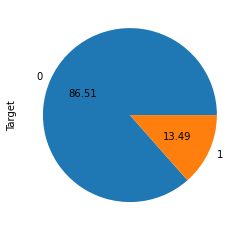

In [194]:
# cek data y_train
y_train.Target.value_counts().plot.pie(autopct='%.2f')

Class y_train diatas sangat imbalanced, maka akan dilakukan oversampling pada train set

In [89]:
# mendefinisikan fungsi untuk melakukan oversampling
def upsample_classes(data, target):
    
    lst = list(data[target].unique())
    
    classes = []
    for c in lst:
        classes.append(data[data[target]==c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0]
    
    regroup = pd.concat(classes)
    maj_class = regroup[regroup[target]==class_lab]

    lst.remove(class_lab)
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes)
    upsample = pd.concat([regroup[regroup[target]==class_lab],minority_classes])

    return upsample

In [91]:
train = pd.concat([X_train,y_train],axis=1)              # mengconcatenate X_train dan y_train untuk kemudian dilakukan oversampling
train_balanced = (upsample_classes(train,'Target'))      # memanggil fungsi upsample_classes sehingga train set dapat balanced
X_train_bal = train_balanced.drop(['Target'],axis=1)     # menginisiasi X_train yang sudah balanced, disimpan dalam X_train_bal
y_train_bal = train_balanced.Target                      # menginisiasi y_train yang sudah balanced, disimpan dalam y_train_bal

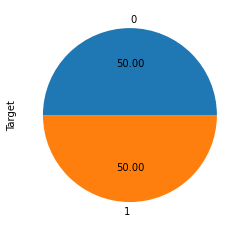

In [92]:
# cek apakah train set sudah balanced
y_train_bal.value_counts().plot.pie(autopct='%.2f')

Berdasarkan pie plot diatas, train set sudah balanced

In [93]:
# cek X_train_bal
X_train_bal

,Own_car,Own_property,Unemployed,Num_family,Total_income,Age,Years_employed,Education_type,Housing_type
1708,1,1,0,2,270000.0,42.024135,16.553386,Secondary / secondary special,House / apartment
7261,0,1,1,1,225000.0,65.082787,0.000000,Higher education,House / apartment
5965,1,1,0,4,243000.0,28.657673,0.547581,Higher education,House / apartment
4207,0,0,0,3,189000.0,27.652861,1.631793,Secondary / secondary special,Municipal apartment
489,1,1,0,3,270000.0,36.159538,3.835808,Secondary / secondary special,House / apartment
...,...,...,...,...,...,...,...,...,...
155,0,0,0,1,180000.0,25.681568,4.690035,Secondary / secondary special,House / apartment
4517,1,0,0,4,450000.0,40.986468,19.666386,Secondary / secondary special,House / apartment
9660,1,1,0,2,112500.0,55.721883,1.842611,Secondary / secondary special,House / apartment
8601,0,1,0,3,140850.0,29.719981,0.878868,Secondary / secondary special,House / apartment


train set sekarang memiliki 13460 baris, karena hasil oversampling

## Data preprocessing

In [96]:
# Inisiasi encoder dan scaler menjadi sebuah pipeline agar lebih efisien 
pipeline = ColumnTransformer([
    ('cat', OrdinalEncoder(), ['Education_type', 'Housing_type']),
    ('num', StandardScaler(), ['Own_car', 'Own_property', 'Unemployed', 'Num_family', 'Total_income', 'Age', 'Years_employed'])
])

Agar encoding dan scaling tidak dilakukan sendiri - sendiri, saya membuat pipeline dengan memanfaatkan ColumnTransformer, dimana argumen dari ColumnTransformer adalah list dari tuple-tuple yang berisi nama encoder/scaler, module encoder/scalernya, dan list kolom yang akan diencode atau discale. Contoh pada 'cat', terdapat list ['Education_type', 'Housing_type'], karena kedua kolom itu yang bertipe kategorik dan perlu dilakukan encoding

In [97]:
# memfit pipeline pada X_train_bal dan disimpan dalam X_train_prepared
X_train_prepared = pipeline.fit_transform(X_train_bal)

In [98]:
# melihat isi X_train_prepared
X_train_prepared

array([[ 4.        ,  1.        ,  1.33024333, ...,  0.79365016,
        -0.10866623,  1.72130304],
       [ 1.        ,  1.        , -0.75174216, ...,  0.3817102 ,
         1.85592581, -0.89278252],
       [ 1.        ,  1.        ,  1.33024333, ...,  0.54648618,
        -1.24748579, -0.8063093 ],
       ...,
       [ 4.        ,  1.        ,  1.33024333, ..., -0.64813969,
         1.05837889, -0.60180013],
       [ 4.        ,  1.        , -0.75174216, ..., -0.38861752,
        -1.15697739, -0.753993  ],
       [ 2.        ,  1.        ,  1.33024333, ...,  1.12320212,
        -0.99532193, -0.17678423]])

In [99]:
X_train_prepared.shape # melihat banyak data pada X_train_prepared

(13460, 9)

In [100]:
y_train_bal = y_train_bal.values  # mengubah bentuk y_train_bal menjadi numpy array
y_train_bal

array([0, 0, 0, ..., 1, 1, 1])

## Tuning model

In [101]:
# inisiasi model - model yang akan digunakan
log_reg = LogisticRegression()
svm_class = SVC()
decision_tree = DecisionTreeClassifier()

In [102]:
# Melakukan cross validation pada ketiga metode
print(cross_val_score(log_reg, X_train_prepared, y_train_bal, cv=5, scoring='f1').sum()/5)
print(cross_val_score(svm_class, X_train_prepared, y_train_bal, cv=5, scoring='f1').sum()/5)
print(cross_val_score(decision_tree, X_train_prepared, y_train_bal, cv=5, scoring='f1').sum()/5)

0.5337618251222019
0.5442992616772372
0.9188203781533195


Berdasarkan cross validation dengan 5 folds dan evaluation metrics f1 score diatas, didapatkan bahwa decision tree memiliki f1 score terbesar yaitu 0.9188. Sehingga akan digunakan Decision Tree

## Train dan evaluasi model

In [103]:
# training model decision tree
decision_tree.fit(X_train_prepared, y_train_bal)

DecisionTreeClassifier()

In [104]:
# mengubah y_test menjadi numpy array berdimensi 1
y_test = y_test.values.reshape(1,-1)[0]
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
# encoding dan scaling X_test lalu disimpan dalam X_test_prepared
X_test_prepared = pipeline.transform(X_test)

In [212]:
# melihat X_test_prepared
X_test_prepared

array([[ 4.        ,  1.        , -0.76977755, ..., -0.85904602,
        -0.9068101 , -0.77184996],
       [ 4.        ,  1.        , -0.76977755, ..., -0.57205183,
        -0.26324444, -0.65141055],
       [ 4.        ,  1.        ,  1.2990766 , ...,  1.60090422,
         0.04296826,  0.15675534],
       ...,
       [ 4.        ,  1.        , -0.76977755, ...,  0.57592495,
         0.59901087, -0.29401969],
       [ 1.        ,  1.        , -0.76977755, ...,  0.57592495,
         0.98684883,  1.79752411],
       [ 4.        ,  1.        , -0.76977755, ..., -0.03906261,
        -0.23965332, -0.66057442]])

In [106]:
# memprediksi X_test_prepared lalu disimpan dalam variabel y_pred
y_pred = decision_tree.predict(X_test_prepared)

In [107]:
# cek score akurasi y_pred
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7760041194644696

Didapatkan bahwa akurasi model decision tree diatas sebesar 77%

In [108]:
import joblib

joblib.dump(decision_tree, 'model_nomor_4.pkl')

['model_nomor_4.pkl']

Menyimpan model

# No 5

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Import package yang akan digunakan untuk nomor 5

## Data Exploration

In [110]:
car_data = pd.read_csv('/content/CarPrice.csv') # inisiasi CarPrice.csv dan disimpan dalam variabel car_data
car_data.head()                                 # melihat 5 baris pertama car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# cek banyaknya baris, kolom, tipe data, dan null values
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Pada car_data terdapat 205 baris, 26 kolom, serta tidak terdapat null values. Tipe data pada masing - masing kolom sangat beragam

In [ ]:
car_data.drop('car_ID', axis=1, inplace=True) # hapus kolom car_ID

Karena car_ID menurut saya tidak penting dalam memprediksi harga mobil, jadi saya hapus kolom car_ID

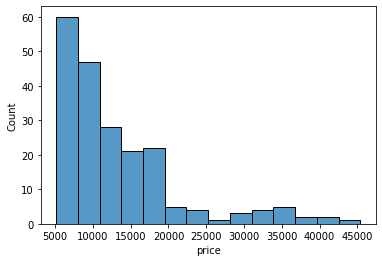

In [ ]:
# cek range dari price
sns.histplot(car_data['price'])

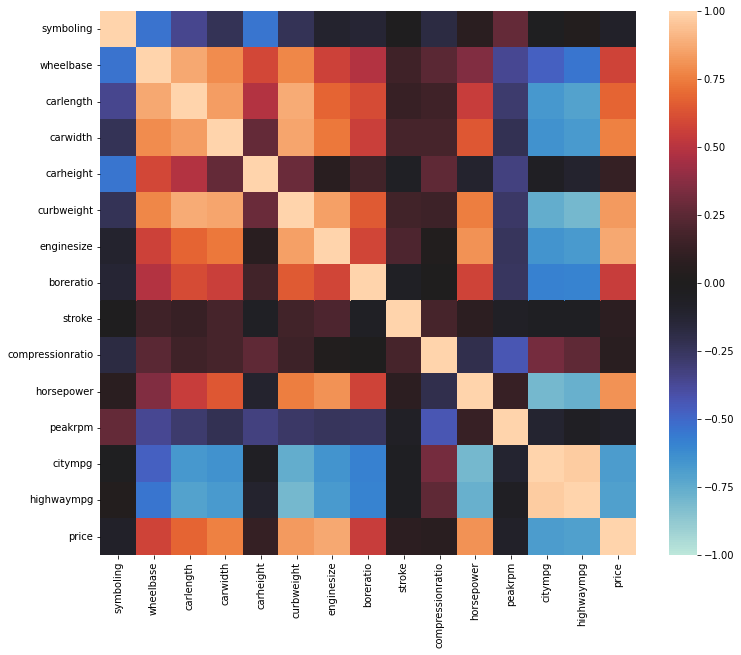

In [ ]:
# melihat korelasi masing-masing fitur numerik melalui heatmap
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(car_data.corr(), vmin=-1, vmax=1, center=0)
plt.show()

Pada heatmap diatas, saya hanya memfokuskan pada baris price. Fitur dengan korelasi yang tinggi dengan price akan diambil sebagai predictor variabel. Terlihat bahwa terdapat cukup banyak fitur yang memiliki korelasi yang tinggi dengan price (warnanya menuju merah terang atau biru terang). Sehingga perlu ditinjau lebih lanjut untuk fitur apa saja yang akan digunakan.

Perlu diperhatikan juga bahwa heatmap diatas hanya berlaku untuk fitur numerik, sehingga untuk fitur kategorik akan dilakukan peninjauan lebih lanjut pada cell-cell kode berikutnya.

## Feature Selection

In [ ]:
high_corr_price_meanval = abs(car_data.corr().price[:14]).mean()            # nilai mean dari korelasi absolut fitur - fitur numerik dengan price
high_corr_price_medianval = abs(car_data.corr().price[:14]).median()        # nilai median dari korelasi absolut fitur - fitur numerik dengan price
high_corr_price_75quantval = abs(car_data.corr().price[:14]).quantile(.75)  # nilai 75th quantile dari korelasi absolut fitur - fitur numerik dengan price

In [ ]:
high_corr_price_mean = car_data.corr().price[abs(car_data.corr().price)>high_corr_price_meanval]          # fitur-fitur dengan korelasi absolut lebih besar dari mean korelasi absolut semua fitur terhadap price
high_corr_price_median = car_data.corr().price[abs(car_data.corr().price)>high_corr_price_medianval]      # fitur-fitur dengan korelasi absolut lebih besar dari median korelasi absolut semua fitur terhadap price
high_corr_price_75quantile = car_data.corr().price[abs(car_data.corr().price)>high_corr_price_75quantval] # fitur-fitur dengan korelasi absolut lebih besar dari 75th quantile korelasi absolut semua fitur terhadap price

Karena pada soal diminta untuk membuat 3 model, disini saya akan menggunakan 3 list fitur yang berbeda untuk memprediksi price, yaitu fitur dengan nilai korelasi absolutnya terhadap price lebih besar dari mean korelasi absolut semua fitur terhadap price, fitur dengan nilai korelasi absolutnya terhadap price lebih besar dari median korelasi absolut semua fitur terhadap price, dan fitur dengan nilai korelasi absolutnya terhadap price lebih besar dari 75th quantile korelasi absolut semua fitur terhadap price.

In [ ]:
print('Fitur yang berkorelasi dengan price lebih dari meannya \n', high_corr_price_mean,'\n')
print('Fitur yang berkorelasi dengan price lebih dari mediannya\n', high_corr_price_median, '\n')
print('Fitur yang berkorelasi dengan price lebih dari 75th quantile-nya\n', high_corr_price_75quantile, '\n')

Fitur yang berkorelasi dengan price lebih dari meannya 
 wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
boreratio     0.553173
horsepower    0.808139
citympg      -0.685751
highwaympg   -0.697599
price         1.000000
Name: price, dtype: float64 

Fitur yang berkorelasi dengan price lebih dari mediannya
 carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
horsepower    0.808139
citympg      -0.685751
highwaympg   -0.697599
price         1.000000
Name: price, dtype: float64 

Fitur yang berkorelasi dengan price lebih dari 75th quantile-nya
 carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
horsepower    0.808139
price         1.000000
Name: price, dtype: float64 



In [ ]:
high_corr_num_mean = high_corr_price_mean.index.values              # menyimpan nama-nama fitur yang berkorelasi dengan price lebih dari mean 
high_corr_num_median = high_corr_price_median.index.values          # menyimpan nama-nama fitur yang berkorelasi dengan price lebih dari median 
high_corr_num_75quantile = high_corr_price_75quantile.index.values  # menyimpan nama-nama fitur yang berkorelasi dengan price lebih dari 75th quantile

high_corr_num_mean, high_corr_num_median, high_corr_num_75quantile

(array(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
        'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
       dtype=object),
 array(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
        'citympg', 'highwaympg', 'price'], dtype=object),
 array(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'price'],
       dtype=object))

Didapatkan bahwa fitur numerik yang berkorelasi dengan price lebih dari meannya ada 9 fitur, yang lebih dari mediannya ada 7 fitur, dan yang lebih dari 75th quantilenya ada 4 fitur (belum termasuk fitur kategorik dan price tidak termasuk karena merupakan target variabel).

Selanjutnya akan ditentukan fitur kategorik yang akan digunakan dengan menggunakan box plot pada masing-masing fitur terhadap price

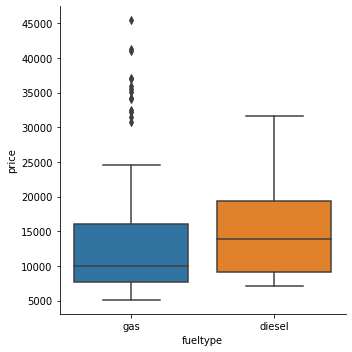

In [ ]:
sns.catplot(data=car_data, x='fueltype', y='price', kind='box')

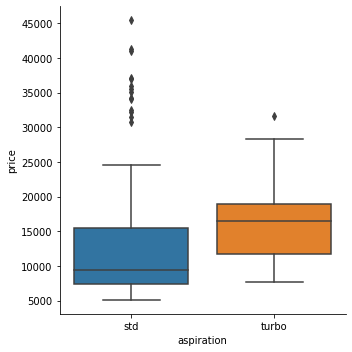

In [ ]:
sns.catplot(data=car_data, x='aspiration', y='price', kind='box')

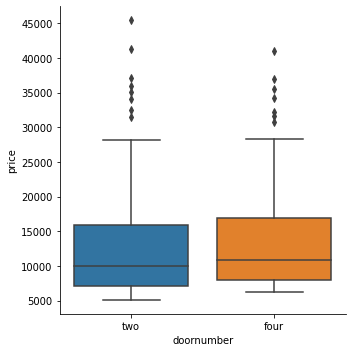

In [ ]:
sns.catplot(data=car_data, x='doornumber', y='price', kind='box')

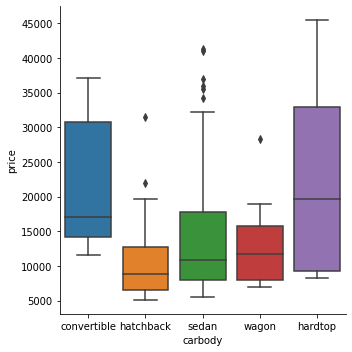

In [ ]:
sns.catplot(data=car_data, x='carbody', y='price', kind='box')

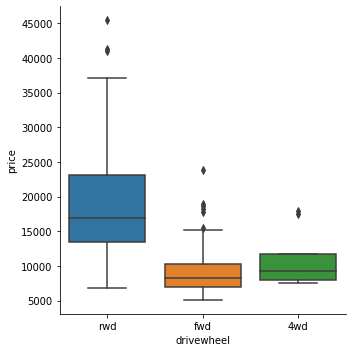

In [ ]:
sns.catplot(data=car_data, x='drivewheel', y='price', kind='box')

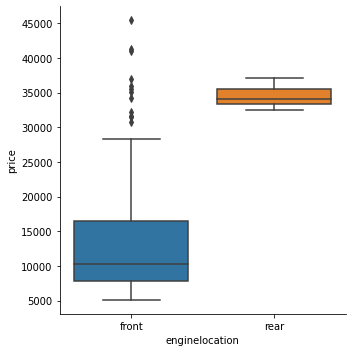

In [ ]:
sns.catplot(data=car_data, x='enginelocation', y='price', kind='box')

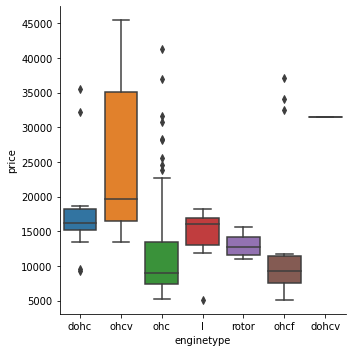

In [ ]:
sns.catplot(data=car_data, x='enginetype', y='price', kind='box')

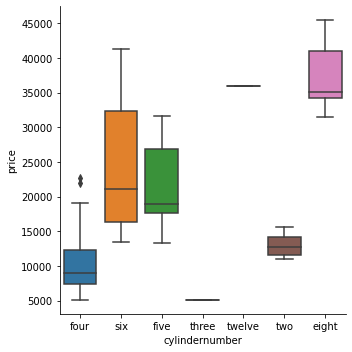

In [ ]:
sns.catplot(data=car_data, x='cylindernumber', y='price', kind='box')

In [ ]:
(car_data.cylindernumber == 'three').sum()

1

cylindernumber dengan nilai three hanya memiliki 1 nilai 

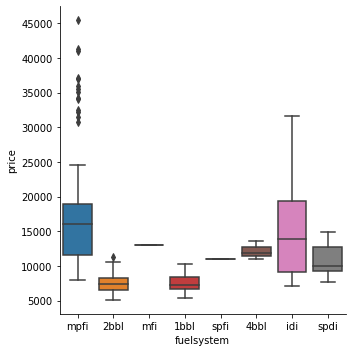

In [ ]:
sns.catplot(data=car_data, x='fuelsystem', y='price', kind='box')

In [ ]:
# fitur-fitur kategorik yang akan digunakan
high_corr_cat = np.array(['drivewheel', 'enginelocation', 'enginetype'])

Berdasarkan box plot diatas, dapat disimpulkan bahwa fitur-fitur kategorik yang berpengaruh terhadap price (tiap nilai pada fitur menghasilkan price yang berbeda-beda) adalah drivewheel, enginelocation, dan enginetype. Nilai-nilai pada cylindernumber terlihat berpengaruh terhadap price, tetapi dapat dilihat bahwa cylindernumber dengan nilai three hanya memiliki 1 nilai, sehingga tidak dapat digunakan apabila pada train set tidak ada cylindernumber bernilai three, tetapi pada test set ada.

In [ ]:
# menggabungkan fitur-fitur kategorik dengan numerik yang akan digunakan
car_data_highcorrmean = car_data[np.append(high_corr_num_mean, high_corr_cat)]              # menggabungkan fitur kategorik dengan numerik yang berkorelasi lebih dari mean korelasi terhadap price
car_data_highcorrmedian = car_data[np.append(high_corr_num_median, high_corr_cat)]          # menggabungkan fitur kategorik dengan numerik yang berkorelasi lebih dari median korelasi terhadap price
car_data_highcorr75quantile = car_data[np.append(high_corr_num_75quantile, high_corr_cat)]  # menggabungkan fitur kategorik dengan numerik yang berkorelasi lebih dari 75th quantile korelasi terhadap price

In [ ]:
# cek fitur-fitur yang akan digunakan, dengan fitur numerik yang berkorelasi lebih dari mean korelasi terhadap price
car_data_highcorrmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wheelbase       205 non-null    float64
 1   carlength       205 non-null    float64
 2   carwidth        205 non-null    float64
 3   curbweight      205 non-null    int64  
 4   enginesize      205 non-null    int64  
 5   boreratio       205 non-null    float64
 6   horsepower      205 non-null    int64  
 7   citympg         205 non-null    int64  
 8   highwaympg      205 non-null    int64  
 9   price           205 non-null    float64
 10  drivewheel      205 non-null    object 
 11  enginelocation  205 non-null    object 
 12  enginetype      205 non-null    object 
dtypes: float64(5), int64(5), object(3)
memory usage: 20.9+ KB


In [ ]:
# cek fitur-fitur yang akan digunakan, dengan fitur numerik yang berkorelasi lebih dari median korelasi terhadap price
car_data_highcorrmedian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carlength       205 non-null    float64
 1   carwidth        205 non-null    float64
 2   curbweight      205 non-null    int64  
 3   enginesize      205 non-null    int64  
 4   horsepower      205 non-null    int64  
 5   citympg         205 non-null    int64  
 6   highwaympg      205 non-null    int64  
 7   price           205 non-null    float64
 8   drivewheel      205 non-null    object 
 9   enginelocation  205 non-null    object 
 10  enginetype      205 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 17.7+ KB


In [ ]:
# cek fitur-fitur yang akan digunakan, dengan fitur numerik yang berkorelasi lebih dari 75th quantile korelasi terhadap price
car_data_highcorr75quantile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carwidth        205 non-null    float64
 1   curbweight      205 non-null    int64  
 2   enginesize      205 non-null    int64  
 3   horsepower      205 non-null    int64  
 4   price           205 non-null    float64
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   enginetype      205 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 12.9+ KB


## Split train dan test set

In [ ]:
# menyimpan predictor variabel ke tiga X yang berbeda untuk masing-masing list fitur numerik yang berbeda
X_bycorrmean = car_data_highcorrmean.drop('price', axis=1).values
X_bycorrmedian = car_data_highcorrmedian.drop('price', axis=1).values
X_bycorr75quantile = car_data_highcorr75quantile.drop('price', axis=1).values

# menyimpan target variabel
y = car_data['price'].copy().values

In [ ]:
# split train dan test set, dengan 3 train dan test set yang berbeda, karena terdapat 3 list fitur numerik yang berbeda
X_train_bycorrmean, X_test_bycorrmean, y_train, y_test = train_test_split(X_bycorrmean, y, test_size=0.2)
X_train_bycorrmedian, X_test_bycorrmedian, y_train, y_test = train_test_split(X_bycorrmedian, y, test_size=0.2)
X_train_bycorr75quantile, X_test_bycorr75quantile, y_train, y_test = train_test_split(X_bycorr75quantile, y, test_size=0.2)

## Data preprocessing

In [ ]:
# Column Transformer untuk korelasi mean
col_trans1 = ColumnTransformer([
    ('cat', OrdinalEncoder(), [9,10,11]),
    ('num', StandardScaler(), [0,1,2,3,4,5,6,7,8])
])

# Column Transformer untuk korelasi median
col_trans2 = ColumnTransformer([
    ('cat', OrdinalEncoder(), [7,8,9]),
    ('num', StandardScaler(), [0,1,2,3,4,5,6])
])

# Column Transformer untuk koerlasi 75th quantile
col_trans3 = ColumnTransformer([
    ('cat', OrdinalEncoder(), [4,5,6]),
    ('num', StandardScaler(), [0,1,2,3])
])

In [ ]:
# encoding dan scaling ketiga X_train yang berbeda dengan ColumnTransformer yang berbeda
X_train_bycorrmean_prepared = col_trans1.fit_transform(X_train_bycorrmean)
X_train_bycorrmedian_prepared = col_trans2.fit_transform(X_train_bycorrmedian)
X_train_bycorr75quantile_prepared = col_trans3.fit_transform(X_train_bycorr75quantile)

## Tuning model

In [ ]:
lin_reg = LinearRegression()  # inisiasi model Linear Regression yang akan digunakan

In [ ]:
# didefinisikan fungsi untuk cek RMSE menggunakan cross validation
def display_rmse(model, X_train):                                                                     # fungsi mengambil argumen model dan X_train  
  scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')) # RMSE dari masing-masing folds disimpan dalam variabel scores (terdapat 5 folds)
  print('Scores on every fold:', scores)                                                              # print RMSE masing-masing folds
  print('RMSE:', scores.mean())                                                                       # print mean RMSE seluruh folds
  print('Standard Deviation:', scores.std())                                                          # print Standar deviasi RMSE seluruh folds

In [ ]:
# cek RMSE lin_reg dengan ketiga X_train yang berbeda
for X_train, name in zip([X_train_bycorrmean_prepared, X_train_bycorrmedian_prepared, X_train_bycorr75quantile_prepared], ['mean', 'median', '75th quantile']):
  print('RMSE by {}:'.format(name))
  display_rmse(lin_reg, X_train)
  print('-----------')

RMSE by mean:
Scores on every fold: [8761.98185341 8688.58583142 7253.3187133  7731.69668166 8046.89861332]
RMSE: 8096.496338624352
Standard Deviation: 572.7003002933795
-----------
RMSE by median:
Scores on every fold: [8125.74256158 9818.29371739 6356.36536512 8312.1243493  6993.51875202]
RMSE: 7921.208949083748
Standard Deviation: 1191.8828810663842
-----------
RMSE by 75th quantile:
Scores on every fold: [2654.47318265 3186.89478514 1978.9220257  3345.98725213 3668.41798912]
RMSE: 2966.939046949773
Standard Deviation: 592.9491252283701
-----------


Didapatkan bahwa X_train dengan fitur numerik yang berkorelasi lebih besar dari 75th quantile korelasi semua fitur terhadap price (X_train_bycorr75quantile_prepared), memiliki nilai RMSE terkecil diantara yang lainnya. Sehingga akan digunakan X_train_bycorr75quantile_prepared sebagai X_train yang akan ditraining oleh model linear regression.

In [ ]:
# inisiasi X train dan X test dengan fitur - fitur yang memiliki RMSE paling kecil pada cell diatas
X_train_prepared = X_train_bycorr75quantile_prepared
X_test = X_test_bycorr75quantile

## Train dan evaluasi model

In [ ]:
# training model lin_reg
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [ ]:
# encoding dan scaling X_test kemudian disimpan dalam variabel X_test_prepared
X_test_prepared = col_trans3.transform(X_test)
X_test_prepared[:5]

array([[ 1.        ,  0.        ,  3.        , -0.27412061, -0.47920105,
        -0.1185066 , -0.40918308],
       [ 1.        ,  0.        ,  3.        , -0.82069545, -1.2364993 ,
        -0.88114909, -0.92518481],
       [ 2.        ,  0.        ,  0.        ,  1.63889133,  2.95731165,
         3.22727981,  1.86122452],
       [ 1.        ,  0.        ,  3.        , -0.72959965, -1.11983978,
        -0.85654772, -0.92518481],
       [ 2.        ,  1.        ,  4.        , -0.45631223,  0.3670748 ,
         1.65279209,  2.6610272 ]])

In [ ]:
# prediksi nilai X_test_prepared kemudian disimpan dalam y_pred
y_pred = lin_reg.predict(X_test_prepared)

In [ ]:
# menghitung nilai RMSE y_pred terhadap nilai aslinya (y_test)
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:
3860.4730311204103


Didapatkan nilai RMSE nya adalah 3860.47

In [ ]:
# 10 baris awal tabel perbandingan antara prediksi lin_reg (y_pred) dengan nilai aslinya (y_test), serta absolut errornya
pd.DataFrame({'y Test':y_test, 'y Prediction':y_pred, 'Absolute Error':abs(y_test-y_pred)})[:10]

,y Test,y Prediction,Absolute Error
0,8499.0,10923.141704,2424.141704
1,6695.0,6322.875831,372.124169
2,32250.0,30732.199634,1517.800366
3,6669.0,6704.073005,35.073005
4,32528.0,35480.310665,2952.310665
5,18344.0,14045.794167,4298.205833
6,6575.0,5674.127920,900.872080
7,8058.0,8362.155648,304.155648
8,41315.0,25052.983007,16262.016993
9,6692.0,5983.295689,708.704311


In [ ]:
import joblib

joblib.dump(lin_reg, 'model_nomor_5.pkl')

['model_nomor_5.pkl']

Menyimpan model

# No 6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

Import package yang diperlukan untuk nomor 6

## Data exploration

In [ ]:
tictactoe = pd.read_csv('/content/TicTacToe.csv') # inisiasi TicTacToe.csv dan disimpan dalam variabel tictactoe
tictactoe.head()                                  # melihat 5 baris awal ticatactoe

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [ ]:
# cek jumlah baris, kolom, tipe data, serta null values
tictactoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


Didapatkan bahwa terdapat 958 baris dan 10 kolom pada tictactoe, dengan tipe data semua kolomnya adalah kategorik, dan tidak terdapat null values. Karena semua tipe datanya adalah kategorik, maka perlu dilakukan encoding pada tahap data preprocessing

In [ ]:
# melihat rangkuman beberapa metrics dari tictactoe
tictactoe.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [ ]:
# cek class pada tictactoe dan apakah target variabel imbalanced
tictactoe.V10.value_counts()

positive    626
negative    332
Name: V10, dtype: int64

Didapatkan bahwa terdapat 2 class, yaitu positive dan negative. Selain itu, data tidak terlalu balanced, tetapi karena perbedaannya tidak terlalu berbeda jauh dan menurut saya jumlahnya cukup untuk masing-masing class, maka tidak akan dilakukan oversampling

## Split train dan test set

In [ ]:
X = tictactoe.drop('V10', axis=1).values  # menyimpan predictor variabel pada X
y = tictactoe['V10'].values               # menyimpan target variabel pada y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # split train dan test set dengan test size 20% dari banyak data aslinya

## Data Preprocessing

In [ ]:
# Membuat ordinal encoder untuk X dan y
ordinal_encoder_X = OrdinalEncoder()                                      # inisiasi ordinal encoder untuk X
X_train_prepared_ordinal = ordinal_encoder_X.fit_transform(X_train)       # menyimpan hasil ordinal encoding X_train ke X_train_prepared_ordinal

ordinal_encoder_y = OrdinalEncoder()                                      # inisiasi ordinal encoder untuk y
y_train_prepared = ordinal_encoder_y.fit_transform(y_train.reshape(-1,1)) # menyimpan hasil ordinal encoding y_train ke y_train_prepared

In [ ]:
# membuat one hot encoder untuk X
one_hot_X = OneHotEncoder()                                               # inisiasi one hot encoder untuk X
X_train_prepared_onehot = one_hot_X.fit_transform(X_train).toarray()      # menyimpan hasil one hot encoding X_train ke X_train_prepared_onehot

Karena pada soal diperlukan nilai f1 score minimal sebesar 90%, maka saya menggunakan dua encoder berbeda untuk X, untuk membandingkan f1 score decision tree nantinya apabila ditrain dengan ordinal encoder dan jika ditrain dengan one hot encoder

In [ ]:
# kategori hasil encoding dengan ordinal encoder
ordinal_encoder_X.categories_, ordinal_encoder_y.categories_

([array(['b', 'o', 'x'], dtype=object),
  array(['b', 'o', 'x'], dtype=object),
  array(['b', 'o', 'x'], dtype=object),
  array(['b', 'o', 'x'], dtype=object),
  array(['b', 'o', 'x'], dtype=object),
  array(['b', 'o', 'x'], dtype=object),
  array(['b', 'o', 'x'], dtype=object),
  array(['b', 'o', 'x'], dtype=object),
  array(['b', 'o', 'x'], dtype=object)],
 [array(['negative', 'positive'], dtype=object)])

Didapatkan bahwa untuk X hasil encode yang bernilai 0 adalah 'b', 1 adalah 'o', dan 2 adalah 'x'. Sedangkan untuk y hasil encode adalah yang bernilai 0 merupakan 'negative', 1 merupakan 'positive'

In [ ]:
one_hot_X.categories_

[array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object)]

Pada one hot encoding, nantinya akan terbentuk 3 kolom berbeda untuk masing-masing nilai b, o, dan x, pada masing-masing fitur. Misal untuk fitur V1. Jika terdapat data dengan fitur V1 bernilai 'o', maka kolom pertama hasil encode adalah 0, kolom kedua 1, dan kolom ketiga 0. Karena 'o' berada pada index ke-2 pada one_hot_X.categories_. Sehingga hasil encoding one_hot_X akan memiliki 27 kolom (9 dikali 3, karena predictor variabel terdapat 9, yaitu V1 sampai V9)

In [ ]:
# X_train sebelum encoding
X_train[:5]

array([['o', 'o', 'x', 'o', 'x', 'x', 'b', 'b', 'x'],
       ['x', 'b', 'o', 'x', 'b', 'o', 'x', 'b', 'b'],
       ['o', 'x', 'x', 'b', 'x', 'b', 'o', 'x', 'o'],
       ['o', 'o', 'o', 'b', 'b', 'x', 'b', 'x', 'x'],
       ['b', 'o', 'x', 'o', 'b', 'x', 'b', 'b', 'x']], dtype=object)

In [ ]:
# cek nilai X_train hasil ordinal encoding dengan X_train sebelum diencode
X_train_prepared_ordinal[:5]

array([[1., 1., 2., 1., 2., 2., 0., 0., 2.],
       [2., 0., 1., 2., 0., 1., 2., 0., 0.],
       [1., 2., 2., 0., 2., 0., 1., 2., 1.],
       [1., 1., 1., 0., 0., 2., 0., 2., 2.],
       [0., 1., 2., 1., 0., 2., 0., 0., 2.]])

In [ ]:
# cek nilai X_train hasil one hot encoding dengan X_train sebelum diencode
X_train_prepared_onehot[:5]

array([[0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [ ]:
# y_train sebelum diencode
y_train[:5]

array(['positive', 'positive', 'positive', 'negative', 'positive'],
      dtype=object)

In [ ]:
# cek nilai y_train hasil ordinal encoding dengan y_train sebelum diencode
y_train_prepared[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]])

## Tuning model

In [ ]:
dec_tree = DecisionTreeClassifier() # inisiasi model decision tree

In [ ]:
# menggunakan metode cross validation untuk memilih encoder terbaik
print('Cross Val Score with Ordinal Encoder:')
cross_val_score(dec_tree, X_train_prepared_ordinal, y_train_prepared, cv=10, scoring='f1').mean()

Cross Val Score with Ordinal Encoder:


0.9056181698239678

In [ ]:
# menggunakan metode cross validation untuk memilih encoder terbaik
print('Cross Val Score with One Hot Encoder:')
cross_val_score(dec_tree, X_train_prepared_onehot, y_train_prepared, cv=10, scoring='f1').mean()

Cross Val Score with One Hot Encoder:


0.9536841659213147

Digunakan cross validation dengan 10 folds dan metrics evaluasi f1 score, dan didapatkan bahwa X_train dengan One Hot Encoder memiliki nilai f1 score yang lebih bagus dari Ordinal Encoder, yaitu sebesar 95%. Sehingga akan digunakan One hot encoder.

## Training dan evaluasi model

In [ ]:
# Training model decision tree
dec_tree.fit(X_train_prepared_onehot, y_train_prepared)

DecisionTreeClassifier()

In [ ]:
# encoding X_test dan y_test
X_test_prepared = one_hot_X.transform(X_test)
y_test_prepared = ordinal_encoder_y.transform(y_test.reshape(-1,1))

In [ ]:
# memprediksi nilai X_test hasil encoding kemudian disimpan dalam variabel y_pred
y_pred = dec_tree.predict(X_test_prepared)

In [ ]:
# menghitung f1 score y_pred terhadap y_test hasil encoding
f1_score(y_test_prepared, y_pred)

0.96

Didapatkan bahwa nilai f1 scorenya lebih besar dari 90%, yaitu 96%

In [ ]:
# cek nilai metrics evaluation lainnya
from sklearn.metrics import classification_report

print(classification_report(y_test_prepared, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93        68
         1.0       0.95      0.97      0.96       124

    accuracy                           0.95       192
   macro avg       0.95      0.94      0.94       192
weighted avg       0.95      0.95      0.95       192



## Plotting Decision Tree

In [ ]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
one_hot_X.categories_

[array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object)]

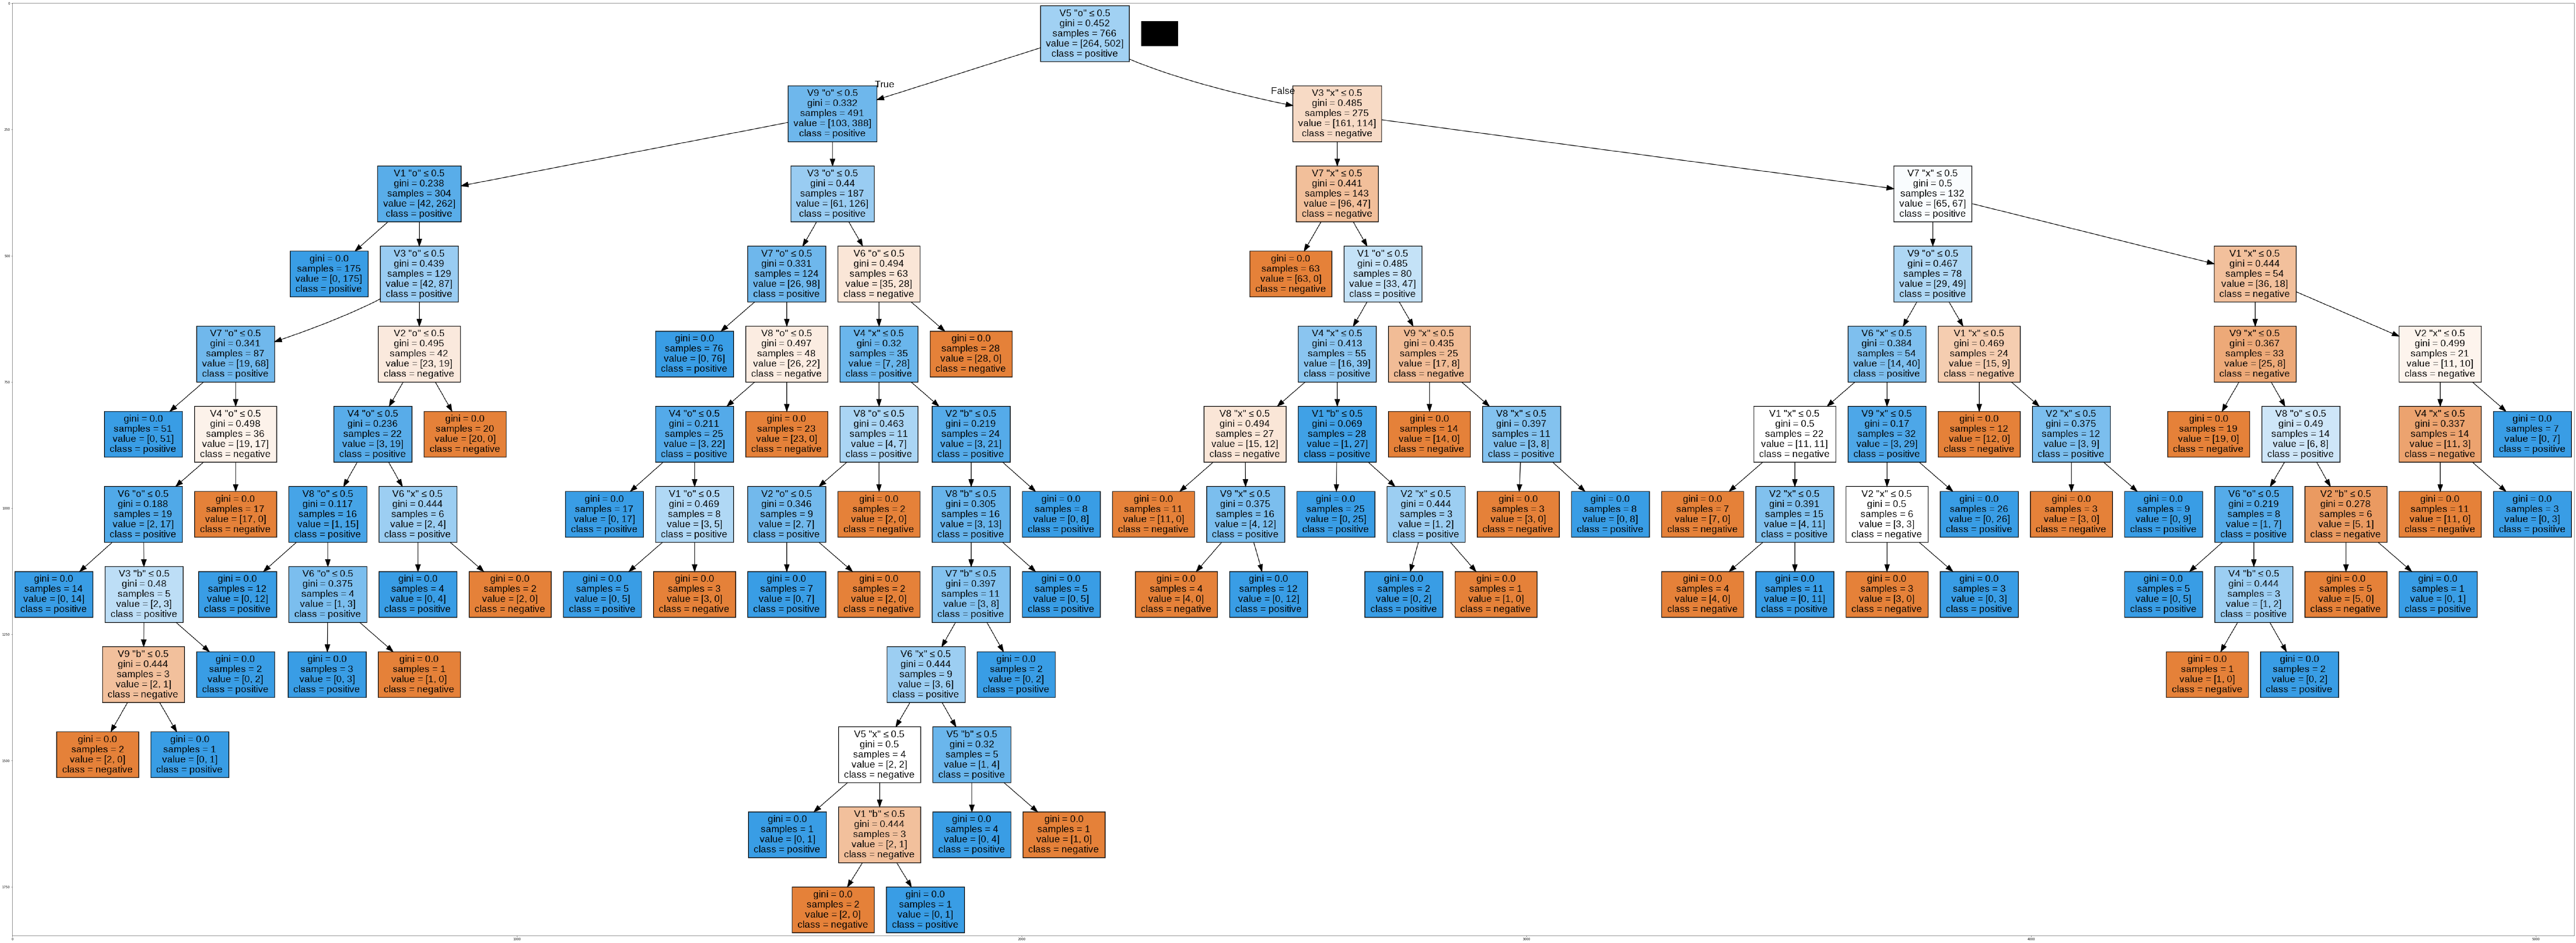

In [ ]:
dot_data = StringIO()
filename = 'tictactoe.png'
feature_names = np.array(['V1 "b"','V1 "o"','V1 "x"','V2 "b"','V2 "o"','V2 "x"','V3 "b"','V3 "o"','V3 "x"',   # inisiasi feature names, karena fitur telah dilakukan one hot encoding
                          'V4 "b"','V4 "o"','V4 "x"','V5 "b"','V5 "o"','V5 "x"','V6 "b"','V6 "o"','V6 "x"',   #sehingga terdapat kolom berbeda untuk nilai yang berbeda pada masing-masing 
                          'V7 "b"','V7 "o"','V7 "x"','V8 "b"','V8 "o"','V8 "x"','V9 "b"','V9 "o"','V9 "x"'])  #fitur
out = tree.export_graphviz(dec_tree, feature_names=feature_names, 
                           out_file=dot_data, class_names=np.unique(y_train),
                           filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(150,250))
plt.imshow(img, interpolation='nearest')

Plotting menggunakan code yang sama dengan modul Praktikum

In [ ]:
import joblib

joblib.dump(dec_tree, 'model_nomor_6.pkl')

['model_nomor_6.pkl']

Menyimpan model